# Heatmap - Matplotlib

In [1]:
# %matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt



### Utility funcion

In [3]:
def create_fake_trace(length, A=1, shift=0, noise=None):
    """ Make a shifted sinus with noise """
    
    if noise is None:
        return A * np.sin(np.arange(0, length, 1)/10+shift)
    else:
        mu, sigma = 0, noise
        return A * np.sin(np.arange(0, length, 1)/10+shift) + np.random.normal(mu, sigma, length)
    

### create fake data

In [4]:
scale, offset, quantity = 10, -5, 1000
delays = scale * np.random.random(quantity) + offset

keys = ['delay','trace']
data = {key: [] for key in keys}

length_of_trace = 300
for delay in delays:
    trace = create_fake_trace(length_of_trace, shift=delay, noise=0.3)
    data['delay'].append(delay)
    data['trace'].append(trace)



### Heatmap

* input all traces -> pd Series  or List of (np.array)
* input all delays -> pd Seires or List of (float)
* input binning -> list of floats


* output: heatmap object with .show()


In [10]:
class Heatmap:
    
        def __init__(self, traces, delays, bins):          
            self.delays = delays
            self.traces = traces
            self.bins = sorted(bins)
            self.__create_heatmap()
            
            
        def __create_heatmap(self):
            self.heatmap = np.zeros((len(self.traces[0]), len(self.bins)) , dtype = float)
            for i in range(len(self.bins)):
                trace_temp = []
                for j in range(len(self.delays)):

                    if i ==0:
                        upper_limit = np.mean([self.bins[i], self.bins[i+1]])
                        if self.delays[j] < upper_limit:
                            trace_temp.append(self.traces[j])
                            
                    elif i ==len(self.bins)-1:
                        lower_limit = np.mean([self.bins[i], self.bins[i-1]])
                        if self.delays[j] >= lower_limit:
                            trace_temp.append(self.traces[j])
                    else:
                        lower_limit = np.mean([self.bins[i], self.bins[i-1]])
                        upper_limit = np.mean([self.bins[i], self.bins[i+1]])
                        if self.delays[j] >= lower_limit and self.delays[j] < upper_limit:
                            trace_temp.append(self.traces[j])
                            
                self.heatmap[:,i] = np.average(trace_temp, axis = 0)

                
        
                
        def show(self, vmin=None, vmax=None, cmap="viridis", colorbar=True):
            fig, ax = plt.subplots()
            im = ax.imshow(self.heatmap,  aspect="auto",cmap=cmap , vmin=vmin, vmax=vmax)
            ax.set_xticks(np.arange(len(self.bins)))
            ax.set_xticklabels(self.bins)
            
            if colorbar == True:
                cbar = ax.figure.colorbar(im, ax=ax)

                


### Demo

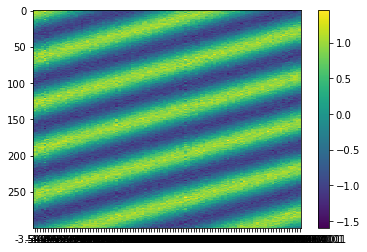

In [11]:
start, end, step = -5, 5, 0.1 
bins = np.linspace(start, end, (end-start)/step+1)

heatmap = Heatmap(data['trace'], data['delay'], bins)
heatmap.show()

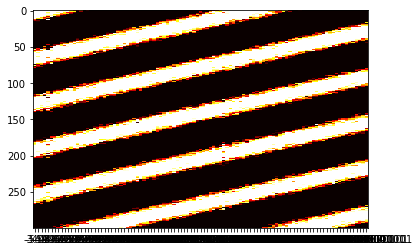

In [7]:
heatmap.show(vmin=0.3,
             vmax=0.7,
             cmap='hot',
             colorbar=False)